# Predicting Heart Disease: An Analysis of Classification Models

Heart disease encompasses various cardiac conditions, including blockages, rhythm irregularities, and congenital defects. This global health concern, known as cardiovascular disease, leads to heart attacks, muscle problems, and irregular beats.

Predicting heart issues is crucial, given its global impact. Healthcare data, when harnessed through data mining and modern techniques like Machine Learning, can offer insights. The gravity is evident with heart disease causing over 610,000 deaths annually in the US alone, with common types like CHD claiming around 370,000 lives.

Detecting heart disease is complex due to multiple factors like high blood pressure and diabetes. Modern approaches, including Machine Learning, promise improved prediction.

This project employs Machine Learning on a [Kaggle dataset]('https://www.kaggle.com/ronitf/heart-disease-uci') to predict heart disease presence.


**Method of Analysis:** <br>

1.	The project’s objective, method of analysis, explanation of the dataset (including independent and dependent variables) and column descriptions.
2.	Cleaning data for any duplications and missing values
3.	Descriptive Statistics with Visualizations
4.  Corelation Analysis
5.  Data Preprocessing
7.  Model Design for Heart disease prediction
9. ML Models(K-Nearest Neighbors, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier)

**Dataset Explanation:** <br>

`Age`: displays the age of the individual<br>   
`Sex`: displays the gender of the individual using the following format (1 = male, 0 = female)<br>                     
`cp`: Chest-Pain Type; displays the type of chest-pain experienced by the individual using the following format <br>  (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptotic)<br>                     
`trestbps`: Resting Blood Pressure; displays the resting blood pressure value of an individual in mmHg (unit)<br>                  
`chol` : Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)<br>             
`fbs`:  Fasting Blood Sugar; Compares the fasting blood sugar value of an individual with 120mg/dl. <br> If fasting blood sugar > 120mg/dl then : 1 (true); else : 0 (false)<br>              
`restecg`:  Resting ECG : displays resting electrocardiographic results <br>
(0 = normal; 
1 = having ST-T wave abnormality; 
2 = left ventricular hyperthrophy)<br>                 
`thalach`: Max heart rate achieved; displays the max heart rate achieved by an individual.<br>

`exang`: Exercise induced angina; (1 = yes; 0 = no)<br>   
`oldpeak`: ST depression induced by exercise relative to rest: displays the value which is an integer or float.<br>             
`slope`:  Peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)<br>              
`ca`:   Number of major vessels (0–3) colored by flourosopy; displays the value as integer or float. <br> 
`thal`:  displays the thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)<br>   
`target`:  Diagnosis of heart disease; Displays whether the individual is suffering from heart disease or not.(0 = absence; 1 = present.)<br>             

        

### Import dataset


In [1]:
import numpy as np
import pandas as pd
from termcolor import colored as cl # text customization

In [2]:
dataset = pd.read_csv(r"dataset.csv")
pd.set_option('display.max_columns', None)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
"Dataset Dimensions: {}x{}".format(dataset.shape[0], dataset.shape[1])

'Dataset Dimensions: 303x14'

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#check for missing value
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Check for duplicate rows
duplicate_rows = dataset[dataset.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
    
    # Drop duplicate rows
    dataset.drop_duplicates(inplace=True)
    print(cl("\nDuplicate rows dropped.", attrs = ['bold']))
else:
    print("No duplicate rows found.")

Duplicate rows found:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  

Duplicate rows dropped.


## Descriptive Statistics

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


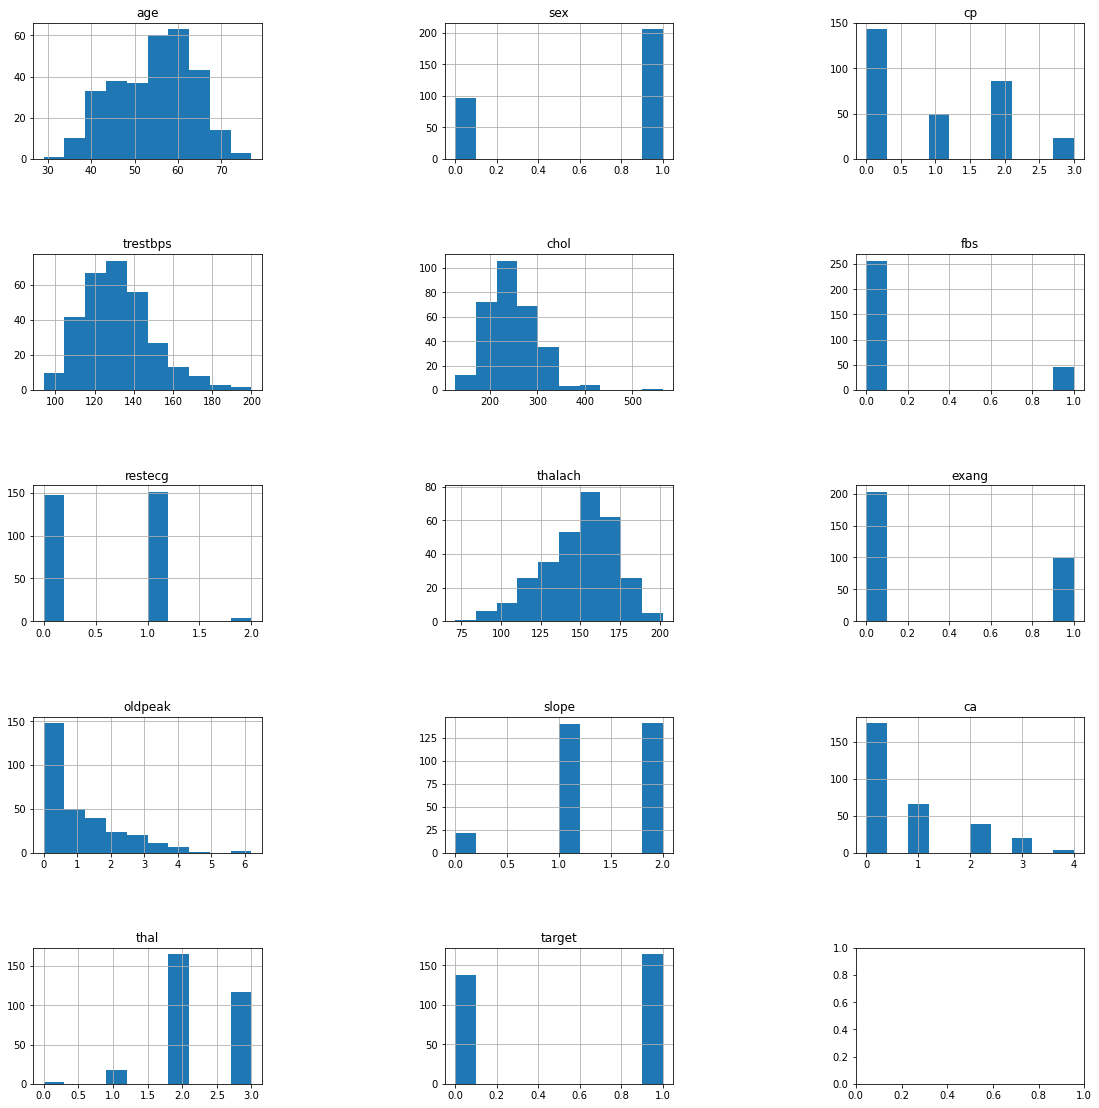

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

# Define the function to plot histograms of numeric features
def plot_hist(df, features, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))
    fig.tight_layout(pad=3.5)
    
    for i, feature in enumerate(features):
        ax = axes[i // n_cols, i % n_cols]
        df[feature].hist(ax=ax)
        ax.set_title(feature)
    
    plt.subplots_adjust(hspace=0.7, wspace=0.8)
    plt.show()

# selected the numeric variables from the dataset to generate a histogram
features = ['age', 'sex',  'cp','trestbps', 'chol', 'fbs', 'restecg', 
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

plot_hist(df=dataset, features=features, n_rows=5, n_cols=3)
plt.subplots_adjust(hspace = 0.7, wspace = 0.8)
plt.tight_layout()

Looking at the histograms, it's clear that each feature varies in its distribution range. So, it's a good idea to scale the data before making predictions. Additionally, the categorical features are quite noticeable and need special consideration.

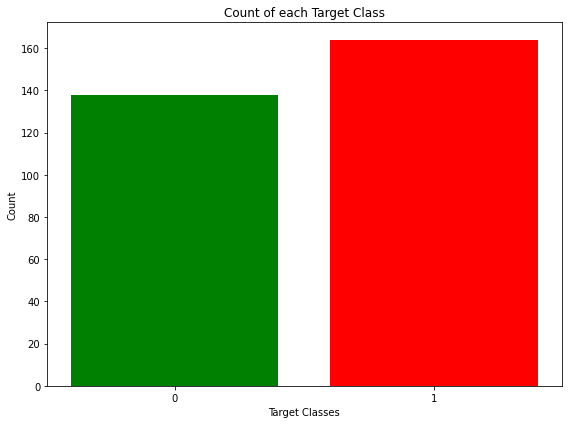

In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
plt.tight_layout()

In [10]:
#from termcolor import colored as cl # text customization
cases = len(dataset)
nonhd_count = len(dataset[dataset.target == False])
hd_count = len(dataset[dataset.target == True])
hd_percentage = round(hd_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-heart disease cases are {}'.format(nonhd_count), attrs = ['bold']))
print(cl('Number of heart disease cases are {}'.format(hd_count), attrs = ['bold']))
print(cl('Percentage of heart disease cases is {}%'.format(hd_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 302
Number of Non-heart disease cases are 138
Number of heart disease cases are 164
Percentage of heart disease cases is 54.3%
--------------------------------------------


## Corelation Analysis

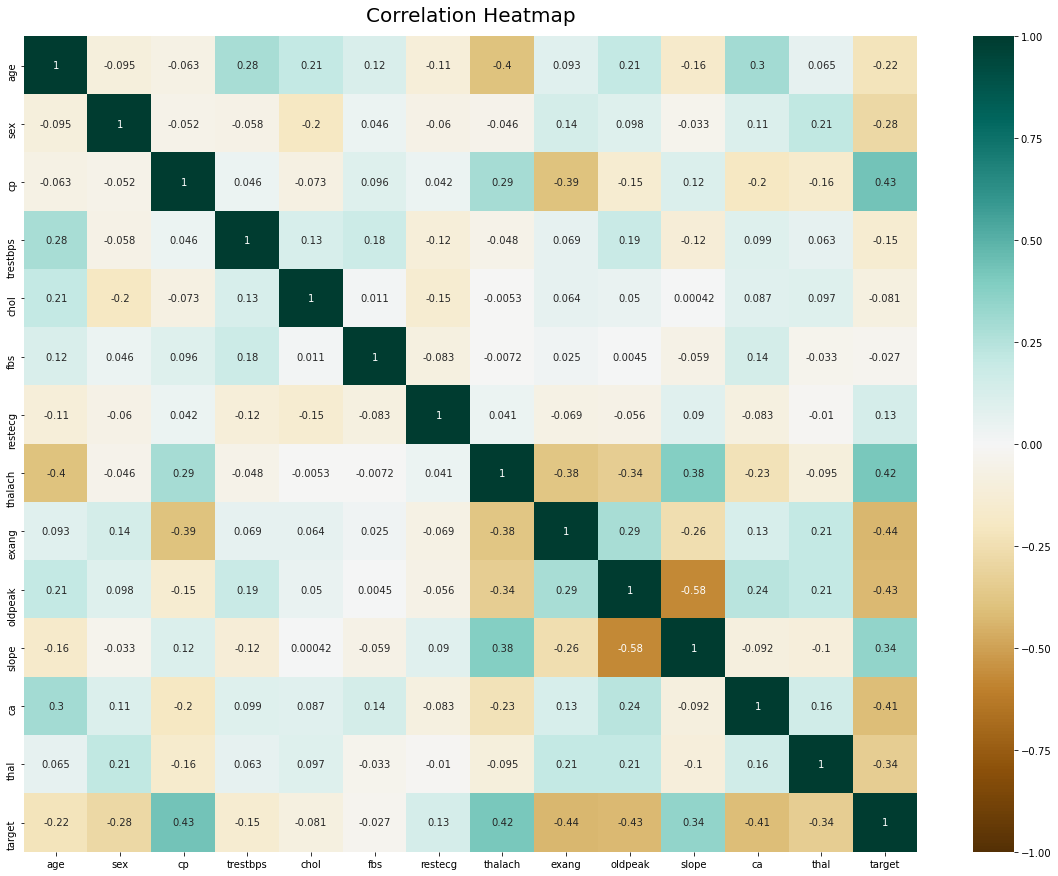

In [11]:
import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

The correlations reveal relationships with the 'target', which indicates the presence (1) or absence (0) of heart disease:

- Age: Older age is linked to a lower likelihood of heart disease.
- Sex: Males (sex = 1) show a slightly lower likelihood of heart disease than females (sex = 0).
- CP (Chest Pain Type): Higher chest pain levels correspond to a higher likelihood of heart disease.
- Thalach (Max Heart Rate): Higher max heart rates relate to a higher likelihood of heart disease.
- Exang (Exercise-Induced Angina): Presence of exercise-induced angina links to a lower likelihood of heart disease.
- Oldpeak (ST Depression): Higher ST depression might indicate a lower likelihood of heart disease.
- Slope: An increased slope is associated with a higher likelihood of heart disease.
- CA (Number of Major Vessels): More vessels could suggest a lower likelihood of heart disease.
- Thalassemia (Thal): Certain types might relate to a lower likelihood of heart disease.

In summary, these correlations provide insight into how each feature is related to the 'target' variable. They can help in understanding which features might have a stronger influence on the outcome and can be used for further analysis and modeling. It's important to note that while correlation gives an indication of linear relationships, it doesn't necessarily imply causation or capture non-linear relationships.

## Data Preprocessing

#### Preparing the Data

Upon reviewing the dataset, it's clear that certain categorical variables need conversion into dummy variables, and all values should be scaled prior to training the Machine Learning models.
To start, I will utilize the `get_dummies` method to generate dummy columns for the categorical variables.

In [12]:
# Perform one-hot encoding on categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dataset = pd.get_dummies(dataset, columns=categorical_columns)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    int64  
 1   trestbps   302 non-null    int64  
 2   chol       302 non-null    int64  
 3   thalach    302 non-null    int64  
 4   oldpeak    302 non-null    float64
 5   target     302 non-null    int64  
 6   sex_0      302 non-null    uint8  
 7   sex_1      302 non-null    uint8  
 8   cp_0       302 non-null    uint8  
 9   cp_1       302 non-null    uint8  
 10  cp_2       302 non-null    uint8  
 11  cp_3       302 non-null    uint8  
 12  fbs_0      302 non-null    uint8  
 13  fbs_1      302 non-null    uint8  
 14  restecg_0  302 non-null    uint8  
 15  restecg_1  302 non-null    uint8  
 16  restecg_2  302 non-null    uint8  
 17  exang_0    302 non-null    uint8  
 18  exang_1    302 non-null    uint8  
 19  slope_0    302 non-null    uint8  
 20  slope_1   

In [14]:
# Use StandardScaler to scale selected columns

from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

# Machine Learning

Next, I will import `train_test_split` to partition our 70% dataset into training and 30% for testing. Following that, I'll import all the Machine Learning models that will be employed for training and evaluating the data.

In [15]:
from sklearn.model_selection import train_test_split

# Separate target and features
y = dataset['target']
X = dataset.drop(['target'], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## K Neighbors Classifier

The classification score is subject to change depending on the selected number of neighbors. Consequently, I will create a score graph by testing various values of K (neighbors) to identify the point at which the optimal score is achieved.

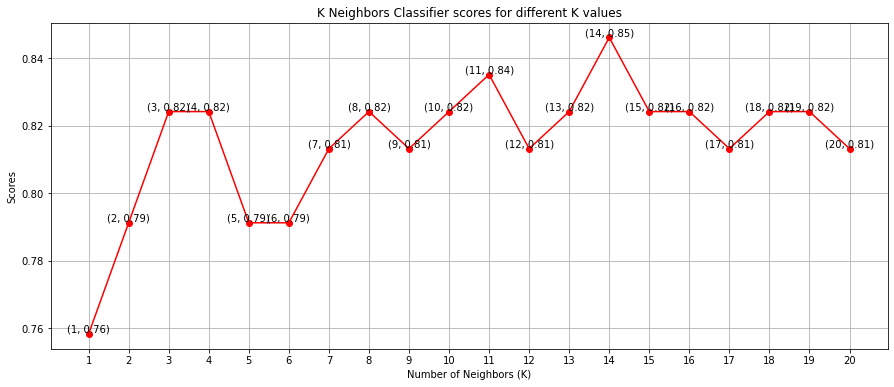

In [16]:
#import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are defined

knn_scores = []

# Iterate over different values of k
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

# Plotting the scores for different values of K
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
for i, score in enumerate(knn_scores, start=1):
    plt.text(i, score, f"({i}, {score:.2f})", ha='center', va='bottom', fontsize=10)
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.grid(True)
plt.show()


In [17]:
score_percentage = round(knn_scores[13] * 100, 2)
neighbors_used = 14

print(cl("The score for K Neighbors Classifier is {}% with {} neighbors.".format(score_percentage, neighbors_used), attrs=['bold']))


The score for K Neighbors Classifier is 84.62% with 14 neighbors.


Based on the plot I've provided, we can observe that the highest score attained is **0.8462**, which corresponds to utilizing **14** neighbors for the K Neighbors Classifier. This result suggests that using **14** neighbors for classification in this scenario yields the most accurate predictions. It's important to consider the balance between the number of neighbors and model accuracy when deciding on an appropriate value for `k`.

Accuracy: 0.846


Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        45
           1       0.83      0.87      0.85        46

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

Confusion Matrix:
[[37  8]
 [ 6 40]]


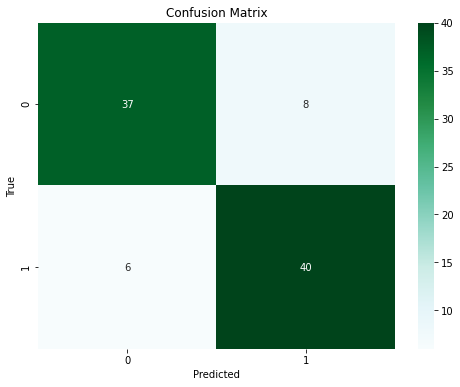

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Create a KNN classifier with k = 14
k = 14
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(cl(f"Accuracy: {accuracy:.3f}\n", attrs=['bold']))

# Classification report
class_report = classification_report(y_test, y_pred)
print(cl("\nClassification Report for KNN Classifier:", attrs=['bold']))
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(cl("Confusion Matrix:", attrs=['bold']))
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The classification report evaluates the K-Nearest Neighbors (KNN) Classifier's performance. It shows that the model achieved macro avg `precision`, `recall`, and `F1-score` of 0.85 for both classes (0 and 1), indicating accurate predictions. The overall accuracy of **85%** confirms its consistent ability to predict heart disease presence and absence.

## Support Vector Classifier

Testing different kernels for the **Support Vector Classifier (SVC)** is crucial for optimizing performance. By evaluating options like linear, polynomial, and RBF kernels, I'll identify the most effective choice. This process enhances the classifier's accuracy and ensures better predictions on new data.

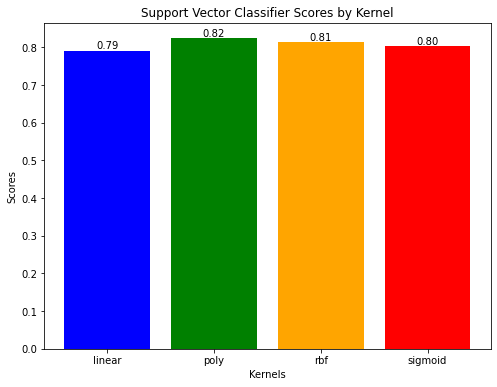

In [19]:
#import matplotlib.pyplot as plt
from sklearn.svm import SVC

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

# Defining custom colors for each bar
bar_colors = ['blue', 'green', 'orange', 'red']

# Plotting bar chart with custom colors and data labels
plt.bar(kernels, svc_scores, color=bar_colors)
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier Scores by Kernel')

# Adding data labels to the bars
for i, score in enumerate(svc_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()


The `poly` kernel exhibited the highest performance, showing a slight improvement over the `RBF` kernel.



In [20]:
score_percentage = round(svc_scores[1] * 100, 2)
kernel_used = 'poly'
print(cl("The score for Support Vector Classifier is {}% with {} kernel.".format(score_percentage, kernel_used),attrs=['bold']))

The score for Support Vector Classifier is 82.42% with poly kernel.


Accuracy: 0.824


Classification Report for SVM Classifier with 'poly' kernel:

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        45
           1       0.81      0.85      0.83        46

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91


Confusion Matrix:
[[36  9]
 [ 7 39]]


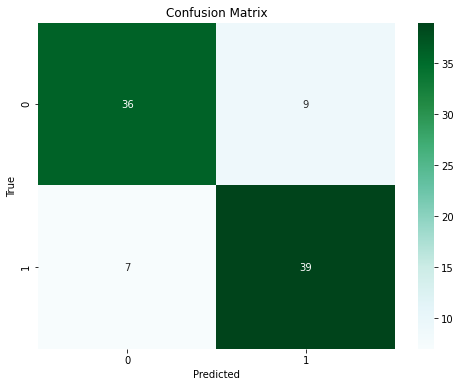

In [21]:
import seaborn as sns

# Train an SVM classifier with 'poly' kernel
svm_classifier = SVC(kernel='poly', random_state=0)
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(cl(f"Accuracy: {accuracy:.3f}\n", attrs=['bold']))

# Print the Classification Report
print(cl("\nClassification Report for SVM Classifier with 'poly' kernel:\n", attrs=['bold']))
print(classification_report(y_test, y_pred))

# Print the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(cl("\nConfusion Matrix:", attrs=['bold']))
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The classification report of SVM Classifier's performance demonstrates `precision`, `recall`, and `F1-score` of **0.82** for both classes (0 and 1), indicating accurate predictions. The model achieves an overall accuracy of 82%, confirming its consistent predictive capacity for heart disease presence and absence.

## Decision Tree Classifier

In this section, I will employ the Decision Tree Classifier to address the given problem. I will experiment with different values of `max_features` to identify the configuration that yields the highest accuracy.

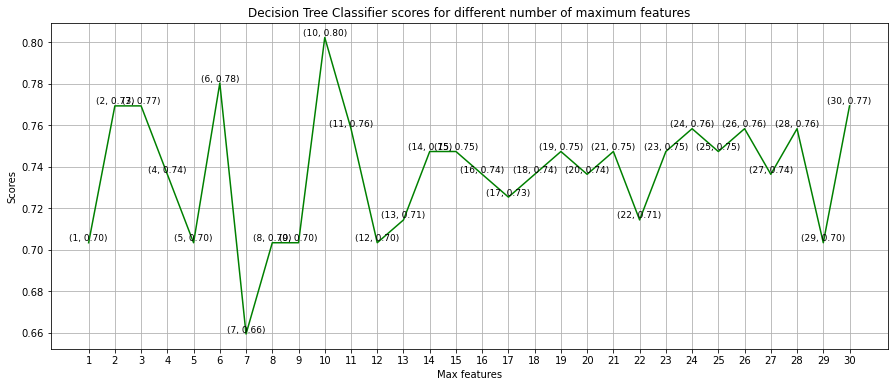

In [22]:
from sklearn.tree import DecisionTreeClassifier
#import matplotlib.pyplot as plt

dt_scores = []

# Iterate through different values of max_features
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

# Plotting scores for each value of max_features

plt.figure(figsize=(15, 6))  # Increase figure size
plt.plot(range(1, len(X.columns) + 1), dt_scores, color='green')
for i, score in enumerate(dt_scores, start=1):
    plt.text(i, score, f"({i}, {score:.2f})", ha='center', va='bottom', fontsize=9)
plt.xticks(range(1, len(X.columns) + 1))
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
plt.grid(True)
plt.show()


In [23]:
score_percentage = round(dt_scores[9] * 100, 2)
max_features_used = 10

print(cl("The score for Decision Tree Classifier is {}% with {} maximum features.".format(score_percentage, max_features_used),attrs=['bold']))

The score for Decision Tree Classifier is 80.22% with 10 maximum features.


In [24]:
# Train a Decision Tree Classifier with optimal max_features
optimal_max_features = dt_scores.index(max(dt_scores)) + 1
optimal_dt_classifier = DecisionTreeClassifier(max_features=optimal_max_features, random_state=0)
optimal_dt_classifier.fit(X_train, y_train)

# Get feature importances and sort them
feature_importances = optimal_dt_classifier.feature_importances_
sorted_feature_importances = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print top 10 features with importance scores
print(cl("Top 10 Features with Importance Scores:",attrs=['bold']))
for feature, importance in sorted_feature_importances[:10]:
    print(f"{feature}: {importance:.4f}")

Top 10 Features with Importance Scores:
thal_2: 0.3111
thalach: 0.1262
oldpeak: 0.1045
trestbps: 0.0668
cp_0: 0.0539
age: 0.0510
ca_1: 0.0504
chol: 0.0483
ca_0: 0.0383
sex_0: 0.0310


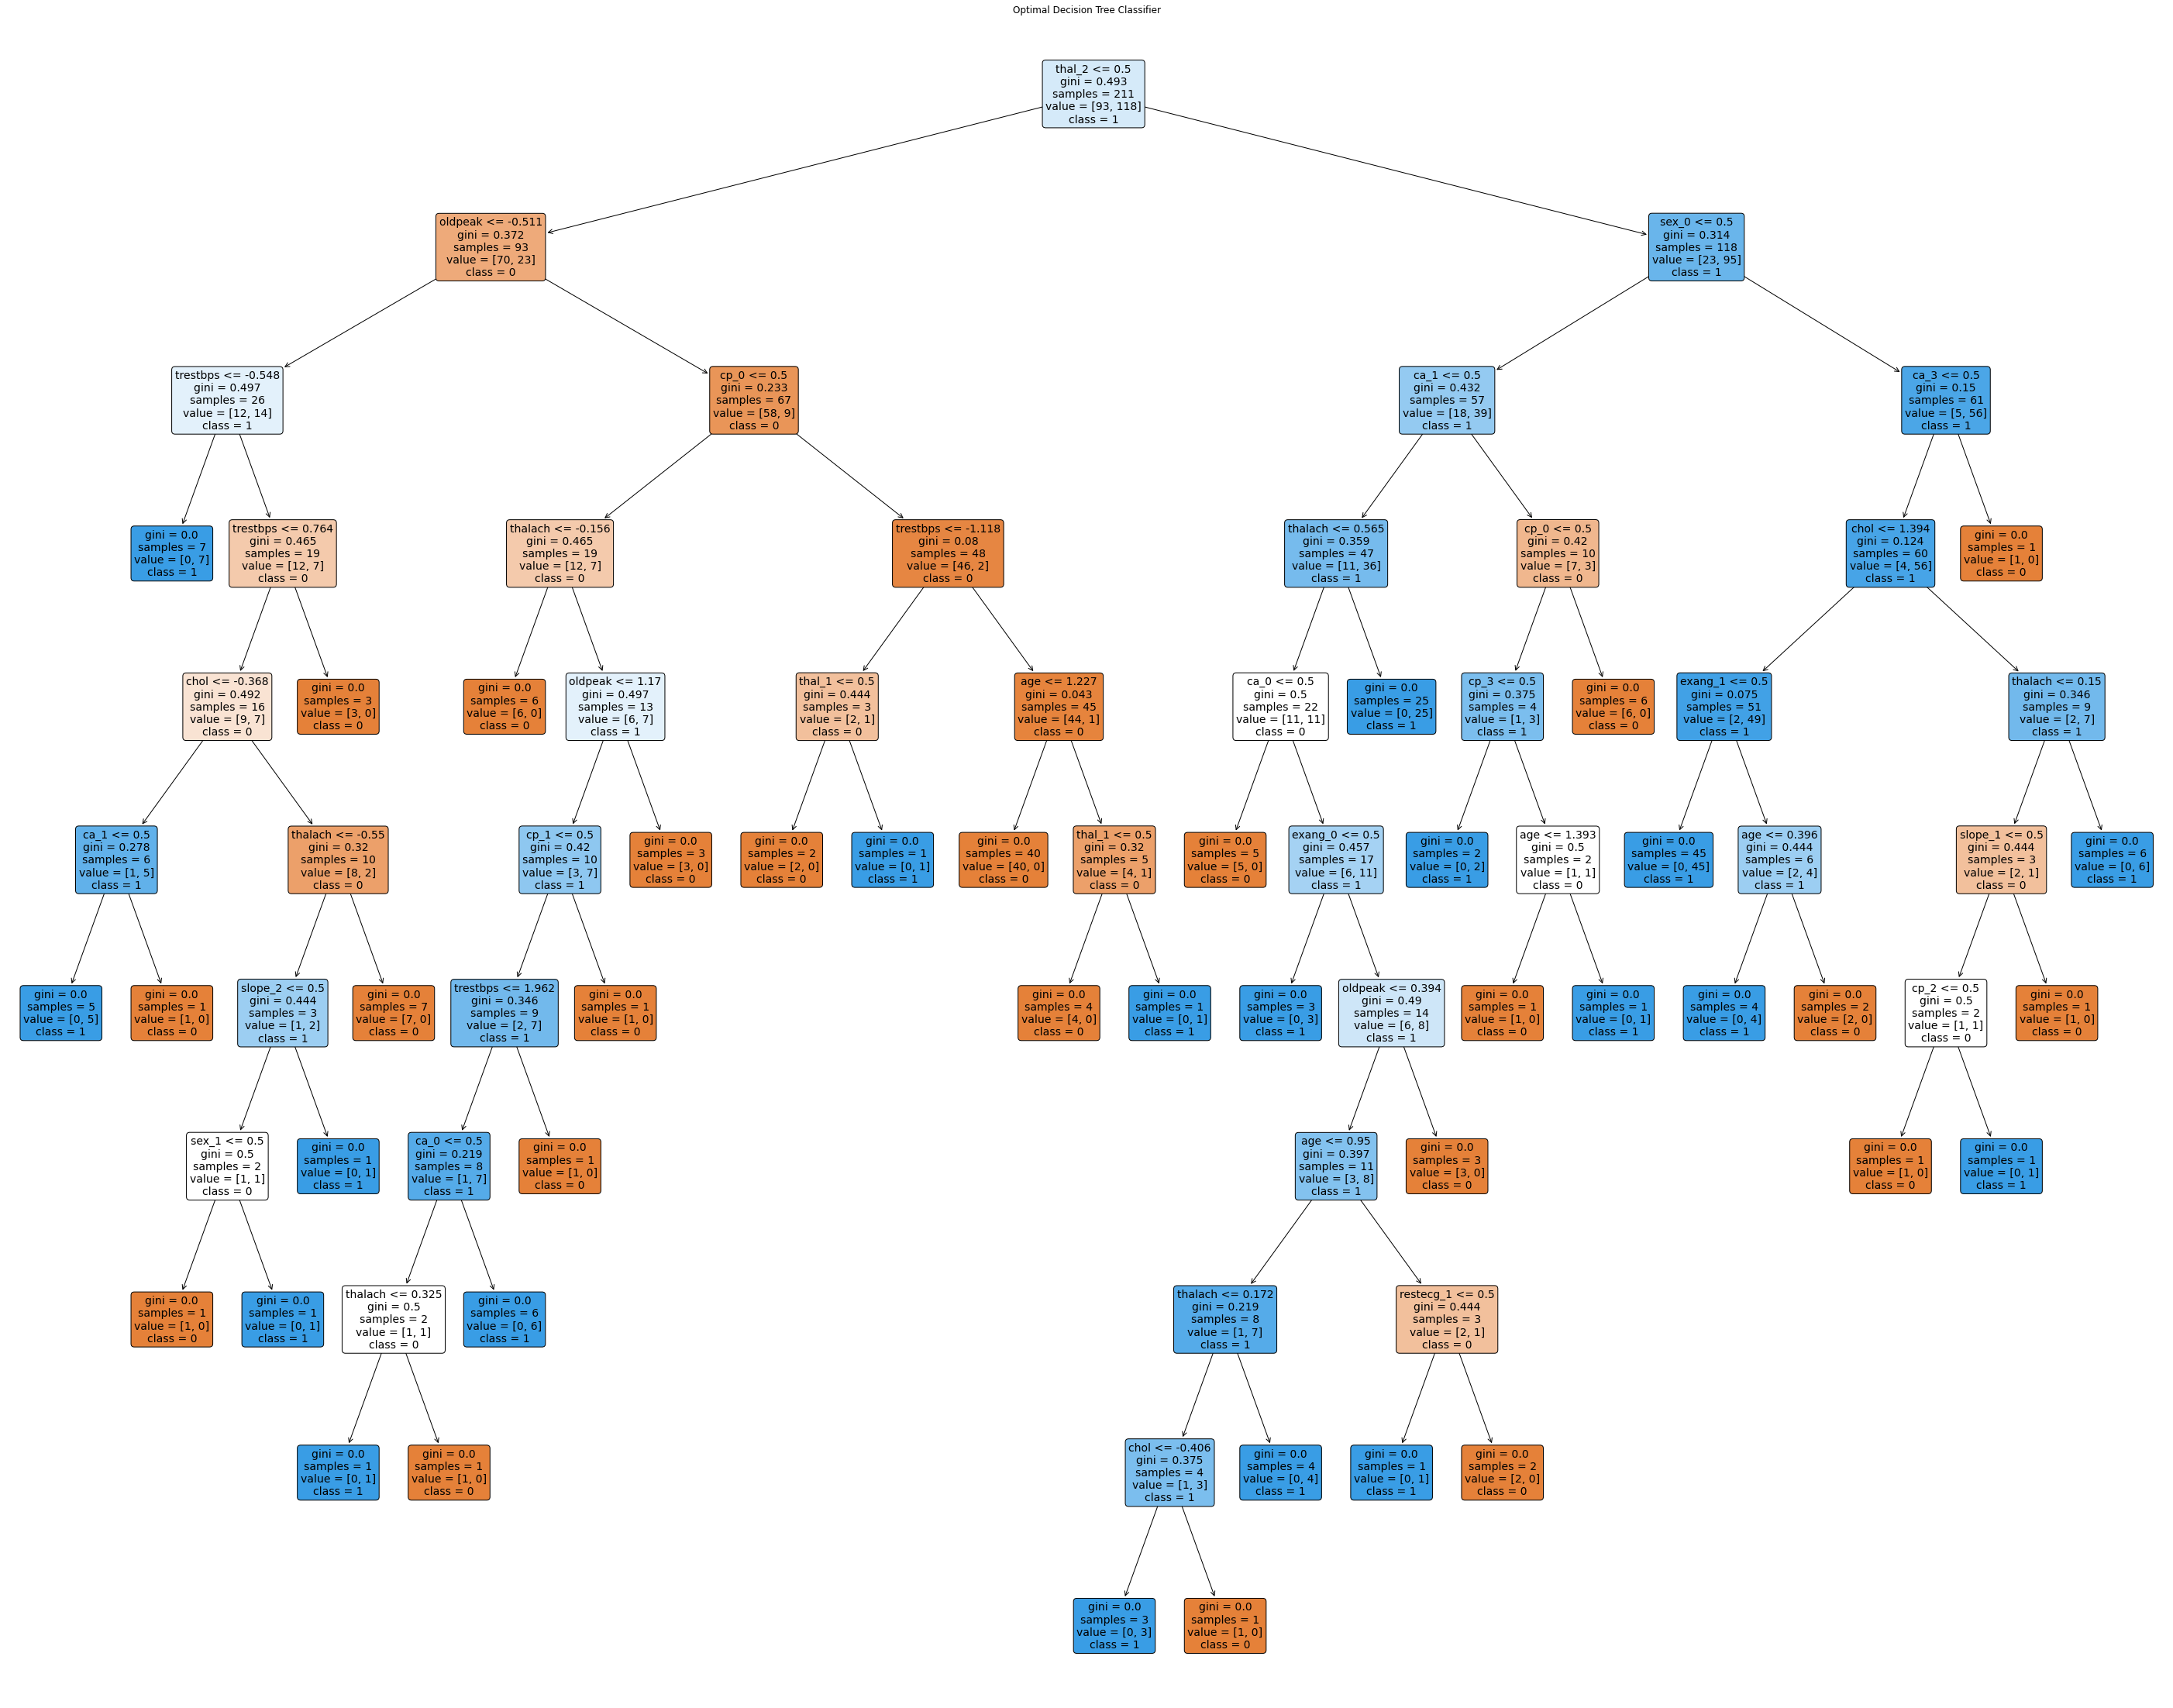

In [25]:
# Plotting the Decision Tree
plt.figure(figsize=(50, 40))
from sklearn.tree import plot_tree
plot_tree(optimal_dt_classifier, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Optimal Decision Tree Classifier")
plt.show()


Accuracy: 0.802


Classification Report for Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        45
           1       0.80      0.80      0.80        46

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91


Confusion Matrix:
[[36  9]
 [ 9 37]]


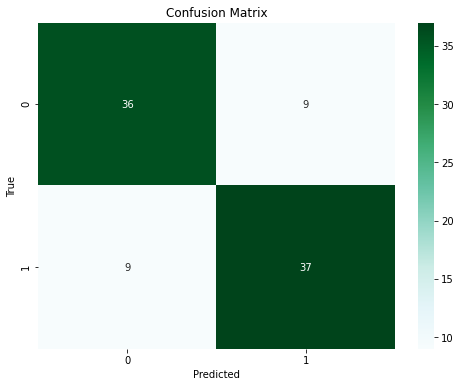

In [26]:
# Train a Decision Tree classifier with max_features=10
dt_classifier = DecisionTreeClassifier(max_features=10, random_state=0)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(cl(f"Accuracy: {accuracy:.3f}\n", attrs=['bold']))

# Print the Classification Report
print(cl("\nClassification Report for Decision Tree Classifier:\n", attrs=['bold']))
print(classification_report(y_test, y_pred))

# Print the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(cl("\nConfusion Matrix:", attrs=['bold']))
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The classification report assesses the K-Nearest Neighbors (KNN) Classifier's performance, highlighting a significant `recall` score of **0.87** for class 1. This means that the model effectively identifies individuals with heart disease (class 1), minimizing the risk of false negatives and ensuring accurate positive predictions. The overall accuracy of **85%** reinforces its reliability in predicting heart disease instances.

## Random Forest Classifier

In this section, I will employ the Random Forest Classifier, an ensemble method, to build the model. I will explore the impact of varying the number of estimators on the model's performance.

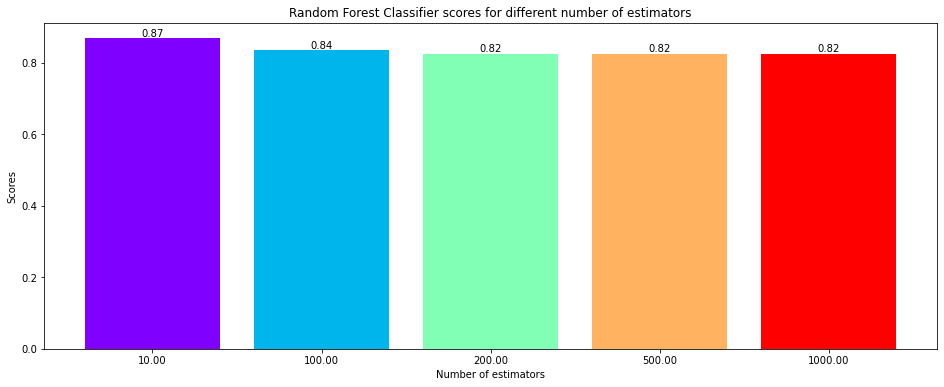

In [27]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

rf_scores = []
estimators = [10, 100, 200, 500, 1000]

# Iterate through different numbers of estimators
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

# Plotting scores for each number of estimators

plt.figure(figsize=(16, 6))  # Adjust figure size
colors = plt.cm.rainbow(np.linspace(0, 1, len(estimators)))
plt.bar(range(len(estimators)), rf_scores, color=colors, width=0.8)
for i, score in enumerate(rf_scores):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom')
plt.xticks(ticks=range(len(estimators)), labels=[f"{estimator:.2f}" for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
plt.show()


In [28]:
# Calculate the rounded score percentage
rounded_score_percentage = round(rf_scores[0] * 100)
estimators_used = 10  # Assuming this is the estimator value you want to highlight

# Print the result with colored formatting
print(cl("The score for Random Forest Classifier is {}% with {} estimators.".format(rounded_score_percentage, estimators_used), attrs=['bold']))

The score for Random Forest Classifier is 87% with 10 estimators.


Accuracy: 0.87


Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.87      0.87      0.87        46

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91


Confusion Matrix:
[[39  6]
 [ 6 40]]


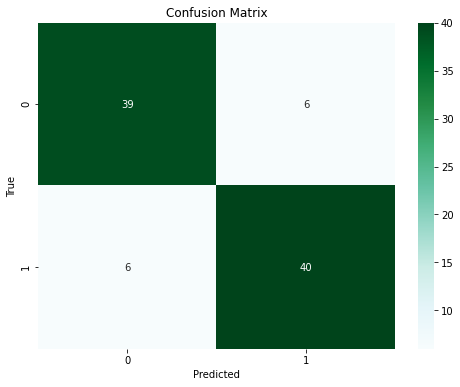

In [29]:
# Train a Random Forest classifier with 10 estimators
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(cl(f"Accuracy: {accuracy:.2f}\n", attrs=['bold']))

# Print the Classification Report
print(cl("\nClassification Report for Random Forest Classifier:\n", attrs=['bold']))
print(classification_report(y_test, y_pred))

# Print the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(cl("\nConfusion Matrix:", attrs=['bold']))
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The classification report summarizes the performance of a Random Forest Classifier in diagnosing heart disease. It shows that the model achieved an accuracy of **87%** in predicting both absence (0) and presence (1) of heart disease. The `precision`, `recall`, and `F1-score` for both classes are consistently 0.87, indicating balanced performance. The report confirms the model's reliability in distinguishing between individuals with and without heart disease.

## Conclusion

In this heart disease prediction project, I utilized Machine Learning to accurately diagnose the presence of heart disease. The data was comprehensively analyzed through visualizations, categorical variables were converted into dummy variables, and features were scaled for consistency.

Implementing four key Machine Learning algorithms - `K Neighbors Classifier`, `Support Vector Classifier`, `Decision Tree Classifier`, and `Random Forest Classifier` - I fine-tuned parameters to enhance model performance. Ultimately, the **Random Forest Classifier** emerged as the frontrunner, achieving an impressive **87%** accuracy with just 10 estimators.

**Recall is crucial in this prediction project to ensure that a significant proportion of individuals with heart disease are correctly identified as positive cases, minimizing the risk of false negatives and enabling timely medical intervention.**

This project exemplifies the synergy between data, algorithms, and insights. It underscores the potential of Machine Learning in medical diagnosis and reinforces the importance of informed decision-making in health-related applications.